## Investigating Investment Advice

There is a lot of investment advice suggesting that for long-term investment you should put
more money into stocks and for short-term investment you should put money into less risky assets like Bonds. Here, we investigate whether our model(GBM) backs up this idea.

Here are some suggestions for things to consider.

The *Sharpe Ratio* of an investment is defined by:

$$ \frac{R_p - R_f}{\sigma} $$
where 
- $R_p$ is the Expected return of the investment.
- $R_f$ is the Risk-free return.
- $\sigma$ is the Standard Deviation of Return.

The Sharpe Ratio is intended to give a measure of an asset's performance by adjusting the return for the amount of risk taken. So it is interesting to ask how the Sharpe Ratio of stock investments changes over time. While a higher Sharpe ratio generally indicates better risk-adjusted performance, it's essential to consider other factors such as the investment horizon, investor risk tolerance, and the consistency of returns. 

One criticism of the Sharpe Ratio is that the standard deviation is not a great measure of risk unless the assets are normally distributed. An alternative measure of risk is the $p\%$-Value at Risk. This is just another way of saying the $p$-th percentile of the loss distribution. Does using this as a risk-measure make any difference to our results or do our results depend upon $p$ at all?

An alternative measure we could consider is simply the probability of making a loss and see if this vary over time.

We have described the optimal trading strategy for an infinite horizon problem, but Merton's original paper works out the optimal investment strategy with a fixed time horizon $T$. Does Merton's solution give any insight into our question?

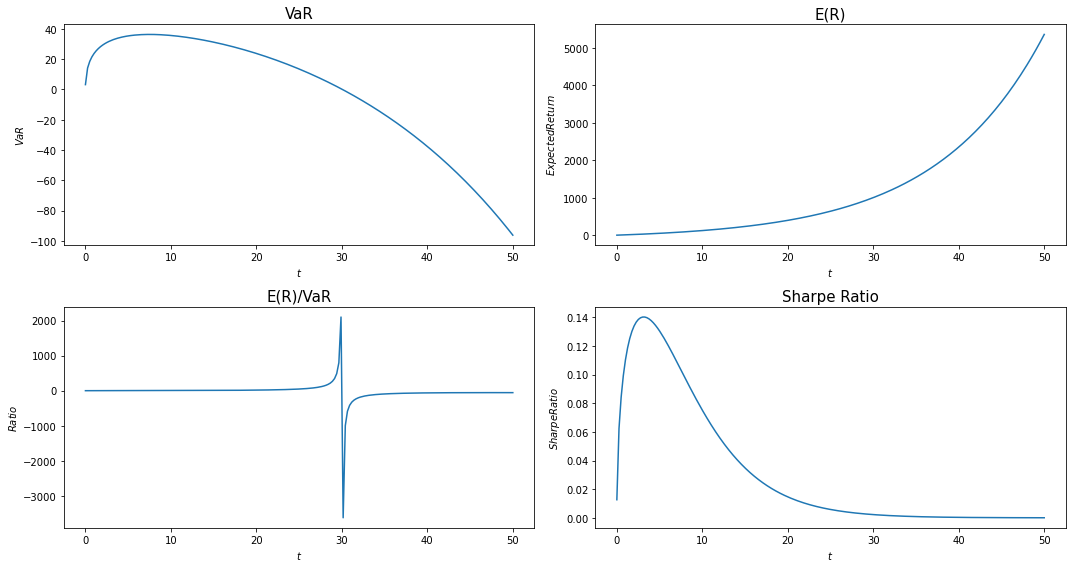

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
plt.rcParams['figure.figsize'] = [15,8]

# We will work with r = 0 for simplicity.

def stock_percentile(S0,mu,sigma,t, p):
    return S0*np.exp( (mu-0.5*sigma**2)*t + sigma*np.sqrt(t)*norm.ppf(p))

S0 = 100
mu = 0.08
sigma = 0.2
p = 0.05

times = np.linspace(0.01,50,200)
var = np.zeros(len(times))
expected_return = np.zeros(len(times))
ratio = np.zeros(len(times))
sharpe = np.zeros(len(times))
for i in range(0, len(times)):
    t = times[i]
    var[i] = -(stock_percentile(S0,mu,sigma,t,p)-S0)
    expected_return[i] = S0 * np.exp(mu*t) - S0
    ratio[i] = expected_return[i]/var[i]
    sd = S0 * np.exp(mu*t) * np.sqrt(np.exp(sigma*2 * t)-1)
    sharpe[i] = expected_return[i]/sd

fig,ax = plt.subplots(nrows=2, ncols=2)
ax[0,0].plot( times, var)
ax[0,0].set_xlabel('$t$')
ax[0,0].set_ylabel('$VaR$')
ax[0,0].set_title('VaR', fontsize = 15)

ax[0,1].plot( times, expected_return, label='Expected Return')
ax[0,1].set_xlabel('$t$')
ax[0,1].set_ylabel('$Expected Return$')
ax[0,1].set_title('E(R)', fontsize = 15)

ax[1,0].plot( times, ratio)
ax[1,0].set_xlabel('$t$')
ax[1,0].set_ylabel('$Ratio$')
ax[1,0].set_title('E(R)/VaR', fontsize = 15)

ax[1,1].plot( times, sharpe)
ax[1,1].set_xlabel('$t$')
ax[1,1].set_ylabel('$Sharpe Ratio$')
ax[1,1].set_title('Sharpe Ratio', fontsize = 15);
plt.tight_layout()

Using the Sharpe ratio as a measure of performance (and hence s.d. as a measure of risk) suggests that stocks are more risky as a long-term investment since we have low sharpe ratio as time increases. The Expected return is greater as time increases.
Using the Value at Risk as a measure of performance gives a confusing graph because the performance becomes negative. This is because the Value at Risk becomes negative after a certain time. So it is difficult to make much of the graph of Ratio after the asymptote. The choice of $p$ will change where the asymptote occurs.

I think that Merton's solution to the problem is interesting, because it says that you should invest the same proportions in stocks and bonds irrespective of the time-horizon of your investment. This result follows if you have CRRA utility. If you have another utility function, the solution to the investment problem will be different and whether you should invest in stocks or bonds will depend upon your precise utility function.

My conclusion is that whether you should invest in stocks or bonds depends heavily upon your utility function. Using VaR or the Sharpe ratio to measure the performance ignores your utility and so I'm very suspicious of these approaches. Measuring risk is trickier than we might think.